In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate


In [0]:
bs = 64

In [62]:
path = untar_data(URLs.CIFAR_100)

path

PosixPath('/root/.fastai/data/cifar100')

In [63]:
path.ls()

[PosixPath('/root/.fastai/data/cifar100/test'),
 PosixPath('/root/.fastai/data/cifar100/train')]

In [0]:
np.random.seed(42)

data = ImageDataBunch.from_folder(path, train ='.', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)




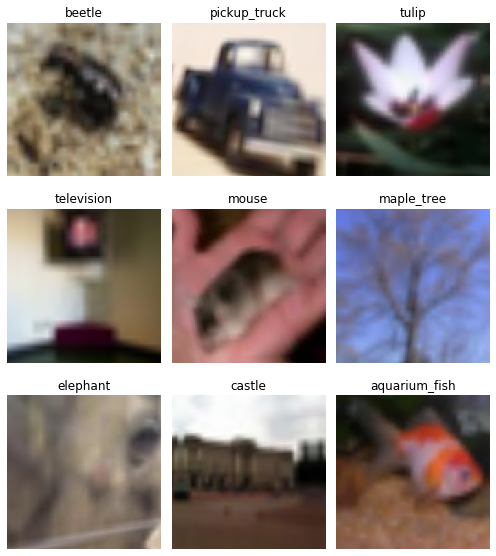

In [65]:
data.show_batch(rows=3, figsize=(7,8))

In [67]:
data.classes

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [69]:
len(data.classes),data.c

(100, 100)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [74]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [76]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.002798,0.774000,0.234917,04:59
1,0.993778,0.731921,0.221500,04:57
2,0.883596,0.668572,0.205500,04:56
3,0.771684,0.650523,0.198500,04:56


In [0]:
learn.save('stage-1')

In [80]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

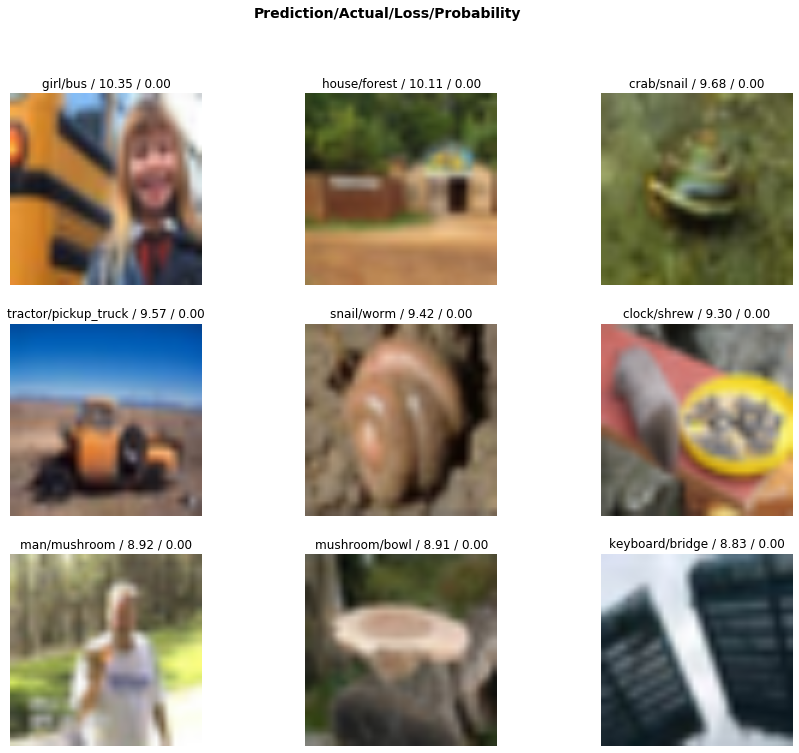

In [81]:
interp.plot_top_losses(9, figsize=(15,12))

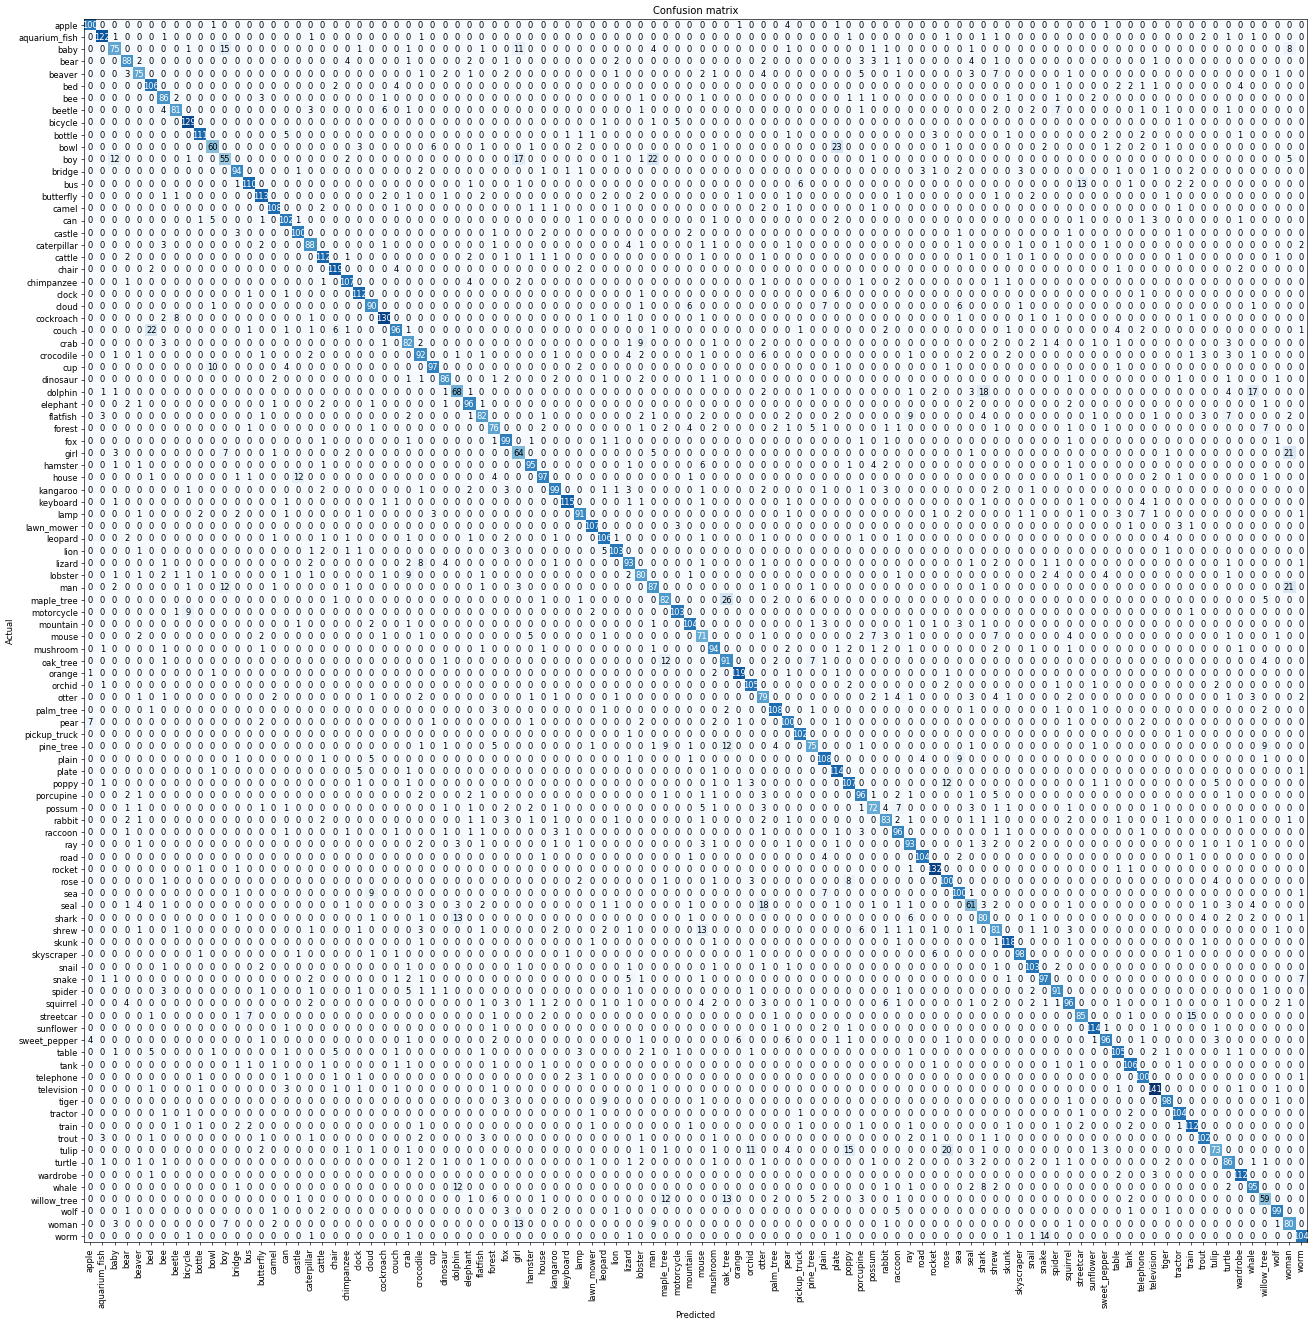

In [85]:
interp.plot_confusion_matrix(figsize=(22,22), dpi=60)

In [86]:
interp.most_confused(min_val=2)

[('maple_tree', 'oak_tree', 26),
 ('bowl', 'plate', 23),
 ('boy', 'man', 22),
 ('couch', 'bed', 22),
 ('girl', 'woman', 21),
 ('man', 'woman', 21),
 ('tulip', 'rose', 20),
 ('dolphin', 'shark', 18),
 ('seal', 'otter', 18),
 ('boy', 'girl', 17),
 ('dolphin', 'whale', 17),
 ('baby', 'boy', 15),
 ('streetcar', 'train', 15),
 ('tulip', 'poppy', 15),
 ('worm', 'snake', 14),
 ('bus', 'streetcar', 13),
 ('shark', 'dolphin', 13),
 ('shrew', 'mouse', 13),
 ('willow_tree', 'oak_tree', 13),
 ('woman', 'girl', 13),
 ('boy', 'baby', 12),
 ('house', 'castle', 12),
 ('man', 'boy', 12),
 ('oak_tree', 'maple_tree', 12),
 ('pine_tree', 'oak_tree', 12),
 ('poppy', 'rose', 12),
 ('whale', 'dolphin', 12),
 ('willow_tree', 'maple_tree', 12),
 ('baby', 'girl', 11),
 ('tulip', 'orchid', 11),
 ('cup', 'bowl', 10),
 ('crab', 'lobster', 9),
 ('flatfish', 'ray', 9),
 ('lobster', 'crab', 9),
 ('motorcycle', 'bicycle', 9),
 ('pine_tree', 'maple_tree', 9),
 ('pine_tree', 'willow_tree', 9),
 ('plain', 'sea', 9),
 ('s

In [0]:
learn.unfreeze()

In [88]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.935103,0.698790,0.209167,05:17


In [89]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (48000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
apple,apple,apple,apple,apple
Path: /root/.fastai/data/cifar100;

Valid: LabelList (12000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pine_tree,chair,bed,bus,elephant
Path: /root/.fastai/data/cifar100;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05

In [91]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


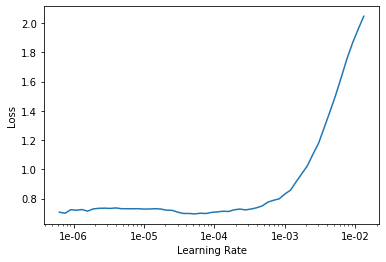

In [92]:
learn.recorder.plot()

In [95]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.778734,0.630357,0.195083,05:18
1,0.636735,0.584596,0.177750,05:18


## Training with resnet 50

In [0]:
data = ImageDataBunch.from_folder(path, train ='.', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [98]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [99]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


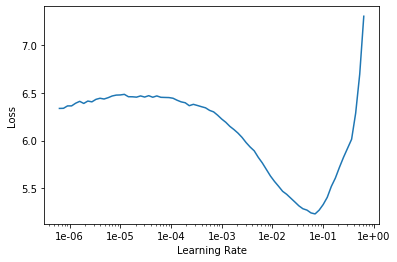

In [100]:
learn.recorder.plot()

In [101]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.939769,1.233047,0.353083,06:46
1,1.285679,0.915263,0.272417,06:46
2,1.087095,0.768974,0.228583,06:45
3,0.963508,0.701252,0.213000,06:45
4,0.804682,0.647733,0.199833,06:44
5,0.722028,0.612044,0.186583,06:43
6,0.621055,0.592473,0.181667,06:44
7,0.592984,0.585981,0.179333,06:44


In [0]:
learn.save('stage-1-50')

In [103]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.588222,0.570863,0.173083,09:15
1,0.507716,0.558233,0.169167,09:14


In [0]:
learn.load('stage-1-50');

In [105]:
interp = ClassificationInterpretation.from_learner(learn)

In [106]:
interp.most_confused(min_val=2)

[('maple_tree', 'oak_tree', 32),
 ('boy', 'man', 22),
 ('boy', 'baby', 21),
 ('girl', 'woman', 20),
 ('woman', 'girl', 19),
 ('bowl', 'plate', 18),
 ('seal', 'otter', 18),
 ('tulip', 'poppy', 17),
 ('pine_tree', 'oak_tree', 16),
 ('mouse', 'hamster', 15),
 ('bus', 'streetcar', 14),
 ('dolphin', 'whale', 14),
 ('girl', 'boy', 14),
 ('tulip', 'orchid', 14),
 ('man', 'woman', 13),
 ('maple_tree', 'willow_tree', 13),
 ('boy', 'girl', 12),
 ('boy', 'woman', 12),
 ('mouse', 'shrew', 12),
 ('shrew', 'mouse', 12),
 ('whale', 'dolphin', 12),
 ('willow_tree', 'oak_tree', 12),
 ('worm', 'snake', 11),
 ('couch', 'bed', 10),
 ('woman', 'man', 10),
 ('beetle', 'cockroach', 9),
 ('girl', 'baby', 9),
 ('man', 'boy', 9),
 ('orchid', 'tulip', 9),
 ('pine_tree', 'maple_tree', 9),
 ('plain', 'sea', 9),
 ('plate', 'bowl', 9),
 ('snake', 'worm', 9),
 ('willow_tree', 'forest', 9),
 ('beaver', 'otter', 8),
 ('beaver', 'shrew', 8),
 ('cloud', 'sea', 8),
 ('couch', 'chair', 8),
 ('cup', 'bowl', 8),
 ('hamster',